#### Red Wine Quality Prediction
Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#lets check the null values without using visualization
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## The data is categorical so I convert it with LabelEncoder to tranfer to ordinal
Labelencoder:This is a categorical feature with numeric values. If I give it to the model as it is, the model will treat it as continuous variable, ie., 2 > 1.
If I apply sklearn.labelEncoder() then I will get:

The LabelEncoder is a way to encode class levels. In addition to the integer example you've included

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
labelencoder = LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

There are 8 rows and 23 columns in the data and when checked the data found veil-type is not contributing any values thus removing the column from the source data


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   fixed acidity         1599 non-null   int64
 1   volatile acidity      1599 non-null   int64
 2   citric acid           1599 non-null   int64
 3   residual sugar        1599 non-null   int64
 4   chlorides             1599 non-null   int64
 5   free sulfur dioxide   1599 non-null   int64
 6   total sulfur dioxide  1599 non-null   int64
 7   density               1599 non-null   int64
 8   pH                    1599 non-null   int64
 9   sulphates             1599 non-null   int64
 10  alcohol               1599 non-null   int64
 11  quality               1599 non-null   int64
dtypes: int64(12)
memory usage: 150.0 KB


We can find all the data is in int values that is number and there are no null values



In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

AxesSubplot(0.125,0.125;0.775x0.755)


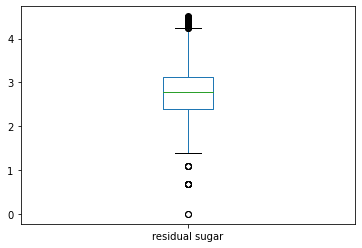

In [25]:
# univariate analysis
print(df['residual sugar'].plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


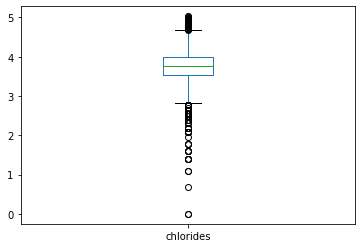

In [26]:
print(df['chlorides'].plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


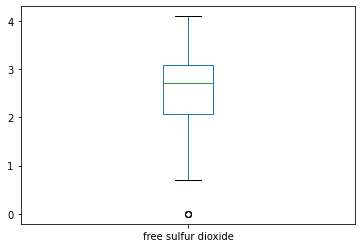

In [27]:
print(df['free sulfur dioxide'].plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


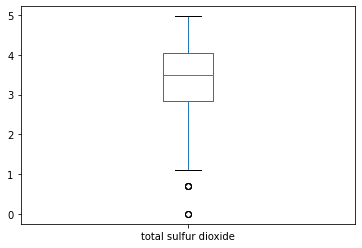

In [28]:
print(df['total sulfur dioxide'].plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


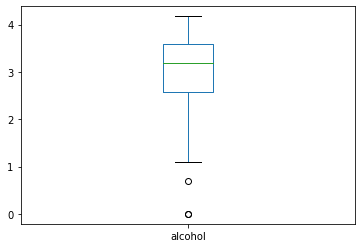

In [29]:
print(df['alcohol'].plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


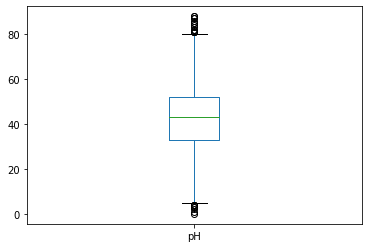

In [30]:
print(df['pH'].plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


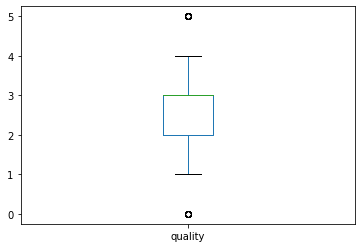

In [31]:
print(df['quality'].plot.box())

In [32]:

#lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(1599, 12)
(1501, 12)


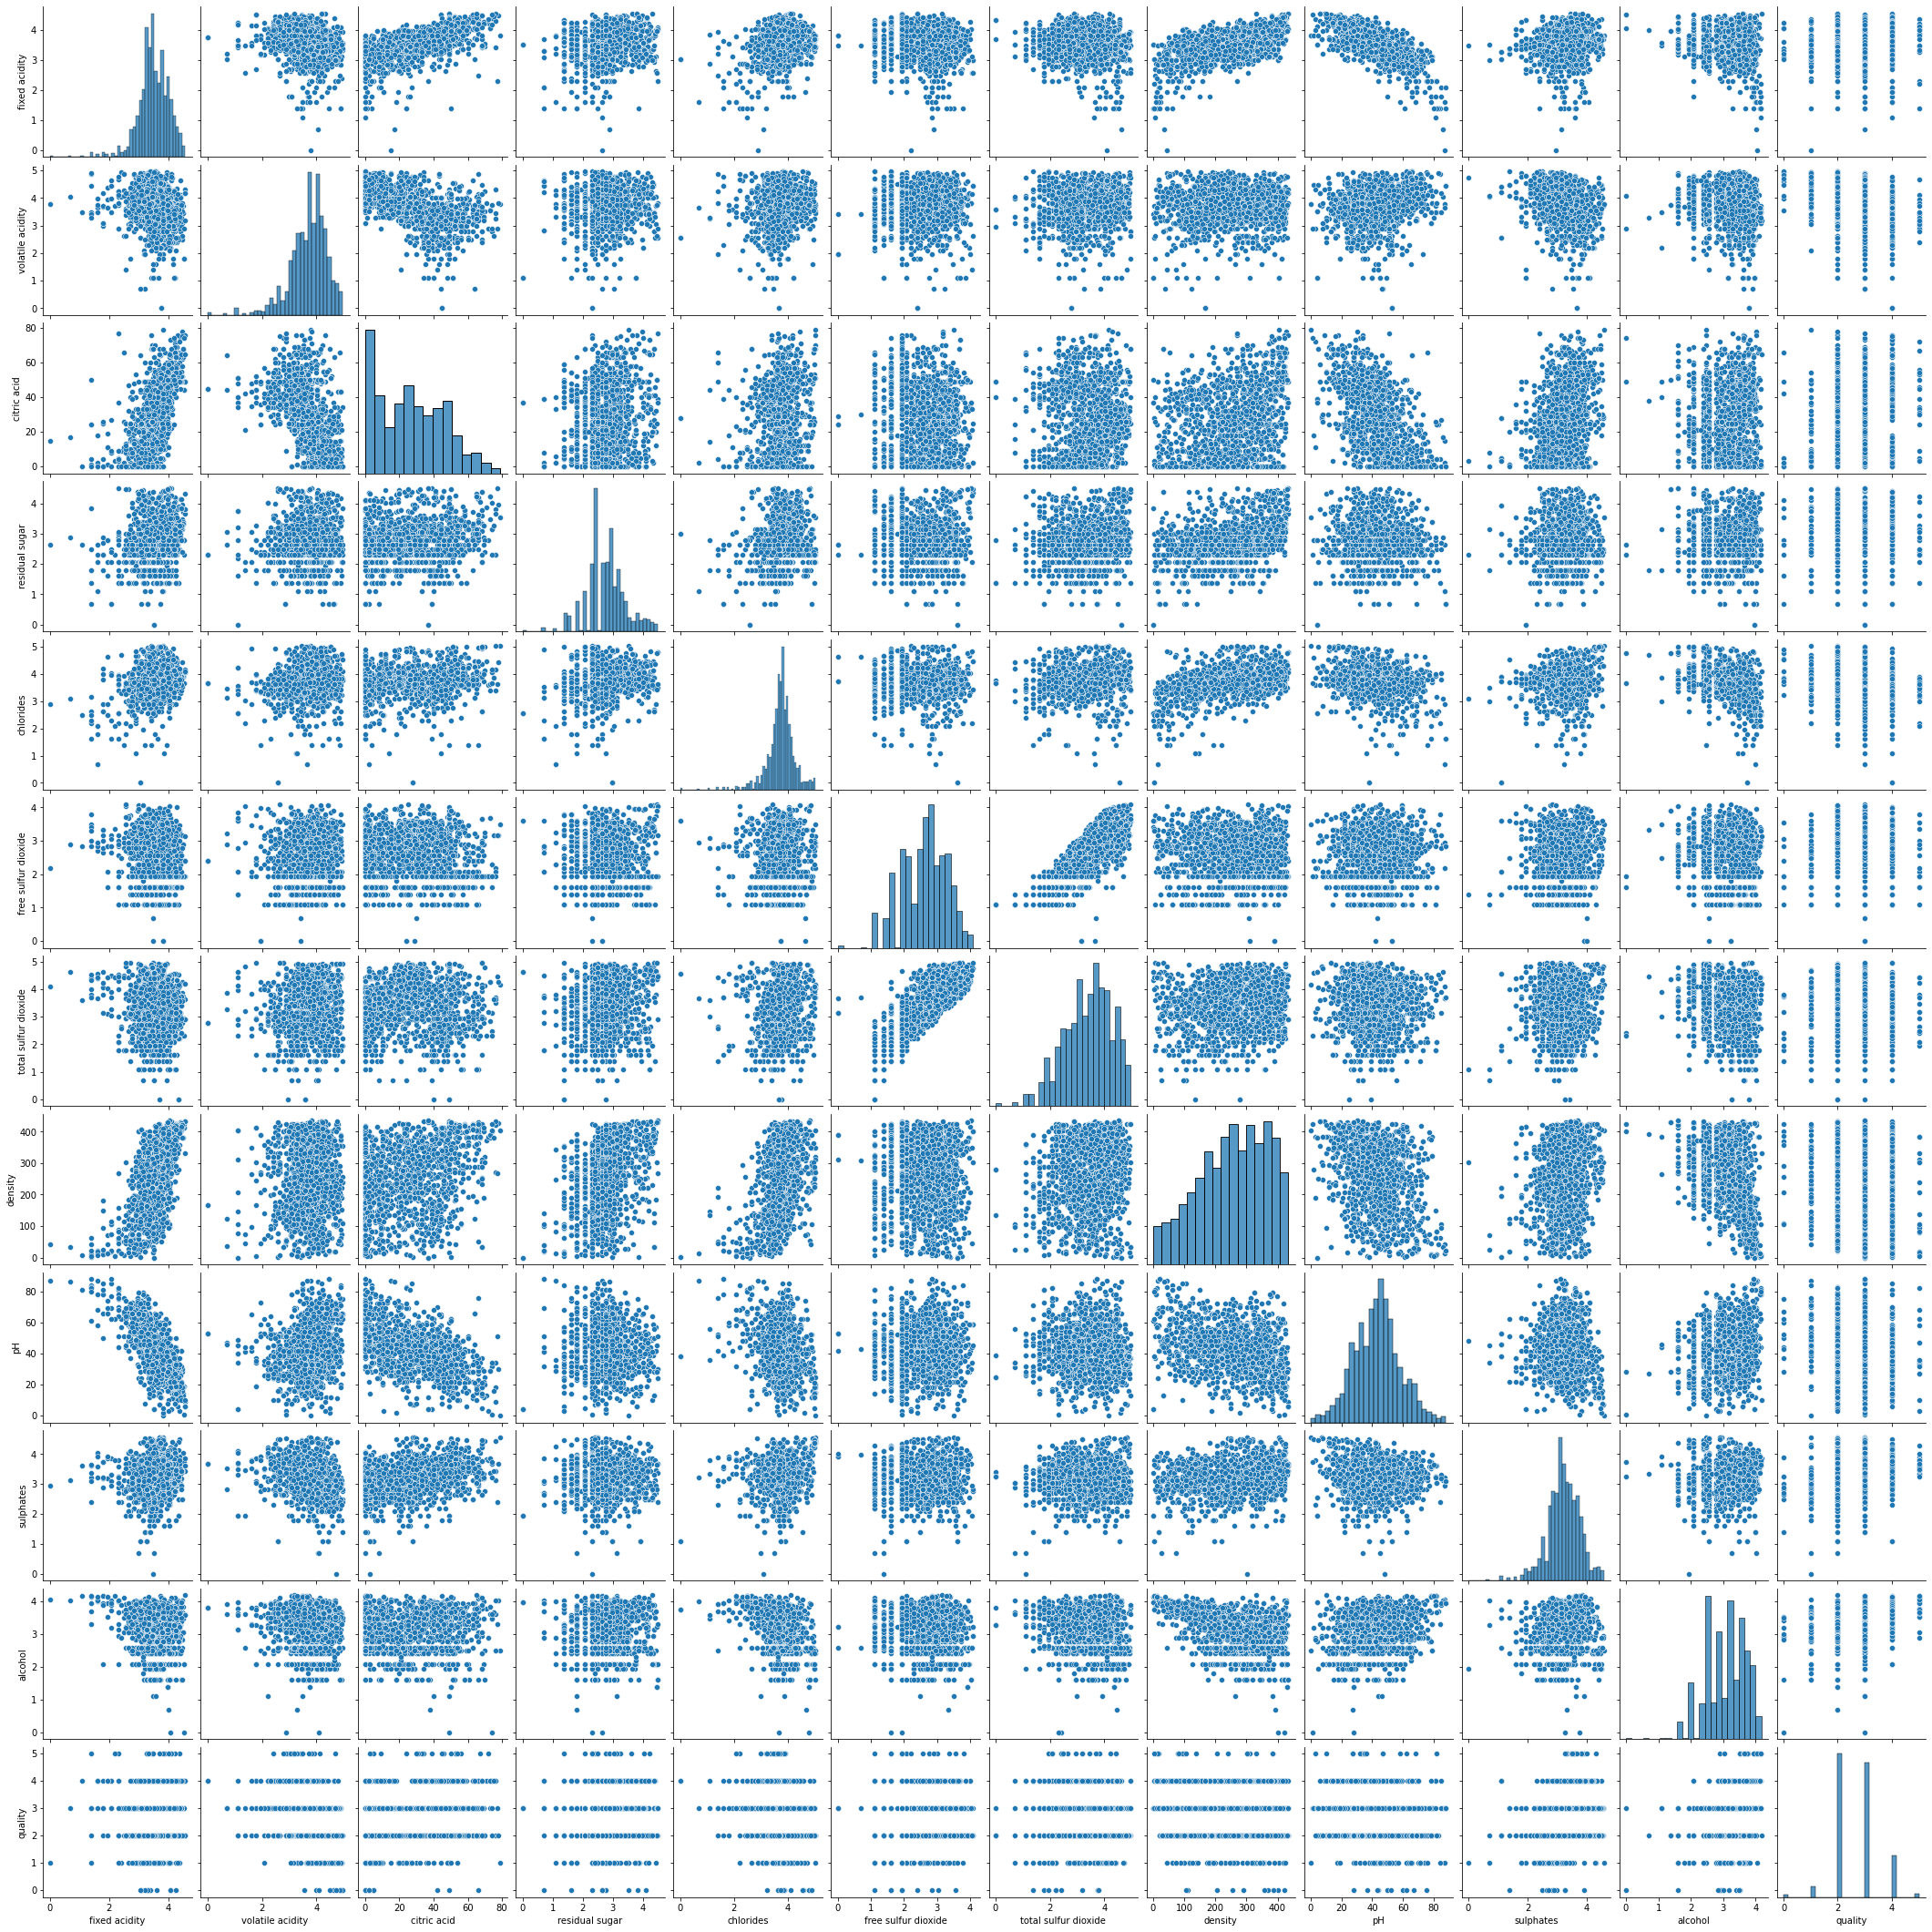

In [33]:

#lets check pairplot using seaborn library

import seaborn as sns
sns.pairplot(df)
plt.show()

In [46]:
df.quality.unique()

array([2, 3, 4, 1, 5, 0], dtype=int64)

In [ ]:
# Above means Target/dependent variable is discrete and categorical in nature
# quality score scale ranges from 1 to 10, where 0 is low quality and 10 is best
# Only scores obtained are between 3 to 5.

In [47]:

df.quality.value_counts()

2    681
3    638
4    199
1     53
5     18
0     10
Name: quality, dtype: int64

###### # Above observations
# Quality has most value concentrated in the categories of 2,3,4
# Few observations are present in the categories in 3 and 4.

# Data visualizations¶


To check missing values

<AxesSubplot:>

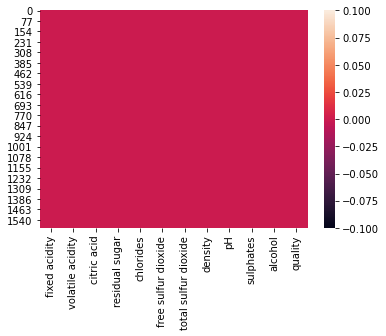

In [48]:
sns.heatmap(df.isnull())

In [49]:

# Dataset has no missing values.
# If there were any, you would've noticed in figure represented by different colour shade.
# Do try it out with other dataset which has missing values, you'll see the difference.
# Eg. in titanic dataset, you will find "Age" and "Cabin" columns with differenct shades with this code.

#### To check correlation¶


In [50]:
dfcor=df.corr()
dfcor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.226523,0.610006,0.206839,0.315758,-0.159728,-0.110409,0.640921,-0.711975,0.159666,-0.134104,0.081745
volatile acidity,-0.226523,1.000000,-0.537144,0.066781,0.157600,0.039365,0.102987,0.057944,0.206241,-0.283256,-0.201681,-0.374264
citric acid,0.610006,-0.537144,1.000000,0.177359,0.136011,-0.087425,-0.015940,0.345859,-0.545492,0.323124,0.069721,0.228282
residual sugar,0.206839,0.066781,0.177359,1.000000,0.206657,0.078049,0.143183,0.402937,-0.076412,0.053339,0.086379,0.034447
chlorides,0.315758,0.157600,0.136011,0.206657,1.000000,-0.006911,0.082602,0.446210,-0.265131,0.120340,-0.318303,-0.193702
free sulfur dioxide,-0.159728,0.039365,-0.087425,0.078049,-0.006911,1.000000,0.790037,-0.034920,0.095501,0.062064,-0.080413,-0.045477
total sulfur dioxide,-0.110409,0.102987,-0.015940,0.143183,0.082602,0.790037,1.000000,0.138423,-0.003757,0.060827,-0.241773,-0.159719
density,0.640921,0.057944,0.345859,0.402937,0.446210,-0.034920,0.138423,1.000000,-0.322701,0.172478,-0.474890,-0.195667
pH,-0.711975,0.206241,-0.545492,-0.076412,-0.265131,0.095501,-0.003757,-0.322701,1.000000,-0.092153,0.204052,-0.060655
sulphates,0.159666,-0.283256,0.323124,0.053339,0.120340,0.062064,0.060827,0.172478,-0.092153,1.000000,0.148329,0.338999


<AxesSubplot:>

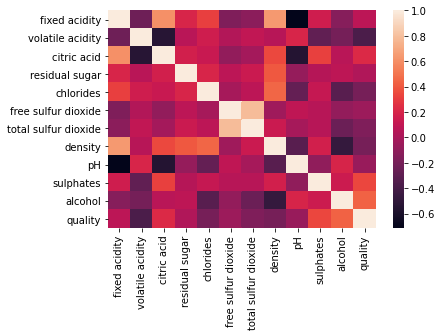

In [51]:
sns.heatmap(dfcor)

In [52]:
# sns.color_palette?

In [53]:
# sns.heatmap?

<AxesSubplot:>

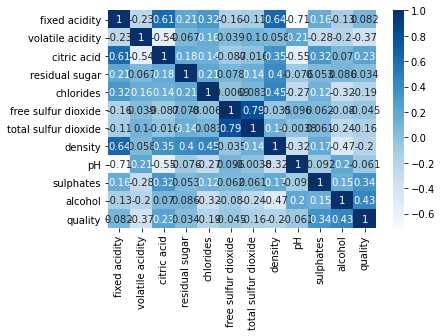

In [54]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

In [55]:
# Above observation: Dark shades are highly correlated.

In [56]:
# sns.heatmap?

<AxesSubplot:>

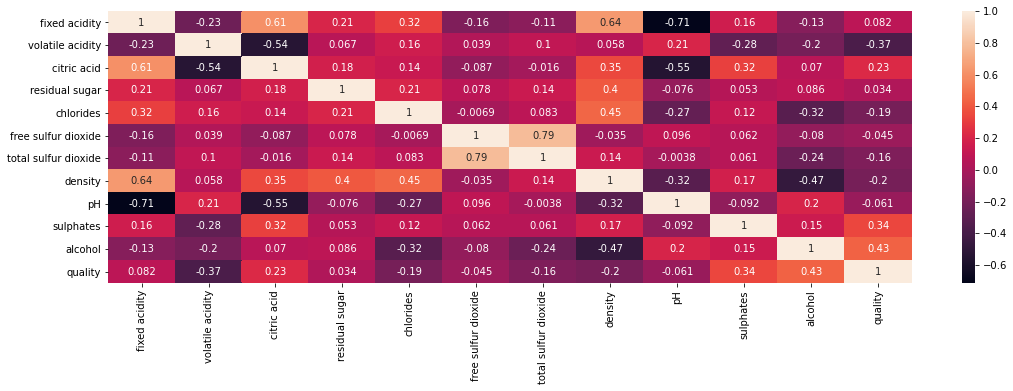

In [58]:
plt.figure(figsize=(18,5))
sns.heatmap(df.corr(),annot=True)

Light shades are highly correlated Quality is highly correlated with alochol alcohol is highly negatively correlated with density with -0.5 (see in dark maroon shade) density is highly positively correlated with residual sugar volatile acidity is negatively correlated with quality free sulphuric acid is highly correlated with total sulfer dioxide

###### Plotting outliers¶

In [59]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [61]:
collist=df.columns.values
ncol=12
nrows=10

In [62]:
# plt.subplot?

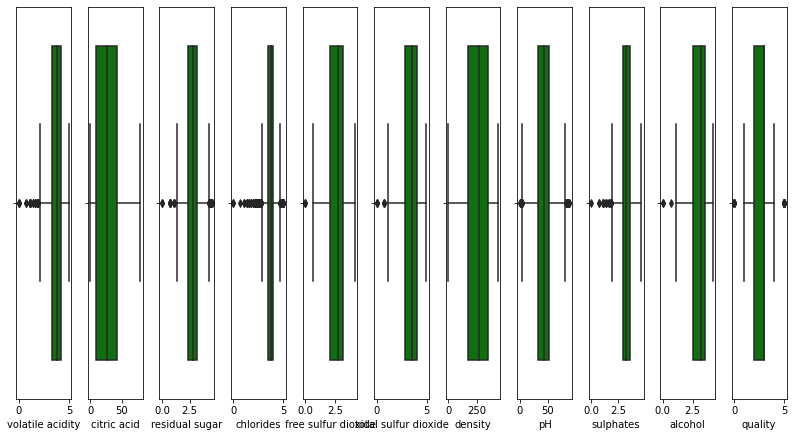

In [63]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

# To check distribution of skewness¶

<AxesSubplot:xlabel='density', ylabel='Density'>

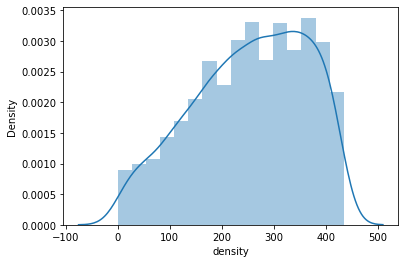

In [64]:
sns.distplot(df['density'])


<AxesSubplot:xlabel='citric acid', ylabel='Density'>

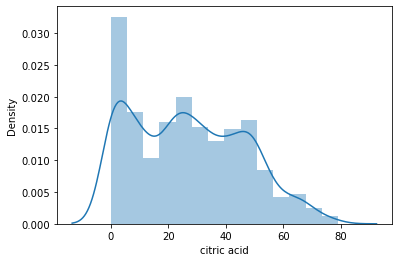

In [65]:
sns.distplot(df['citric acid'])


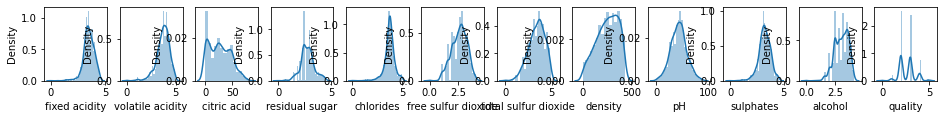

In [66]:
# plt.figure(figsize=(5*totalcol,5*totalcol))
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

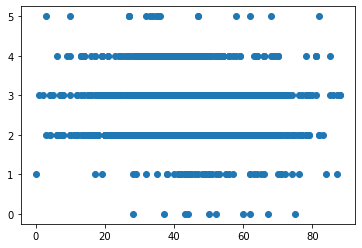

In [67]:
# bivariate analysis
plt.scatter(df['pH'],df['quality'])

In [68]:
# Remove the missing values
# Drop the negatively correlated columns
# Remove the outliers

In [69]:
# Data cleaning is done

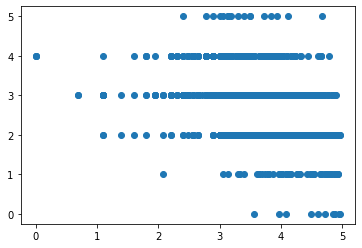

In [70]:
plt.scatter(df['volatile acidity'],df['quality'])
plt.show()

In [71]:
df.drop('volatile acidity',axis=1,inplace=True)

In [72]:
df.head()

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,3.332205,0,2.397895,3.688879,2.484907,3.367296,342,63,2.944439,2.484907,2
1,3.465736,0,3.135494,4.127134,3.258097,4.127134,271,32,3.433987,2.890372,2
2,3.465736,4,2.890372,4.025352,2.772589,3.891820,287,38,3.332205,2.890372,2
3,4.189655,56,2.397895,3.663562,2.890372,4.007333,354,28,3.044522,2.890372,3
4,3.332205,0,2.397895,3.688879,2.484907,3.367296,342,63,2.944439,2.484907,2


In [73]:
df.shape

(1599, 11)

## Removing outliers¶


In [74]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.33342947, 1.39398429, 0.57909488, ..., 0.4848146 , 1.00680182,
        0.78782264],
       [0.06944387, 1.39398429, 0.5562299 , ..., 0.40477252, 0.32840829,
        0.78782264],
       [0.06944387, 1.18810235, 0.17893326, ..., 0.21981715, 0.32840829,
        0.78782264],
       ...,
       [1.31991271, 0.72486797, 0.17893326, ..., 0.77474426, 0.73568   ,
        0.45084835],
       [1.85025863, 0.77633846, 0.4451655 , ..., 0.57262956, 0.15291959,
        0.78782264],
       [1.70375048, 1.02512857, 1.2880101 , ..., 0.28358367, 0.73568   ,
        0.45084835]])

In [75]:
threshold=3
print(np.where(z>3))

(array([   7,   34,   45,   64,   65,   94,   95,  142,  144,  170,  198,
        210,  230,  371,  444,  459,  469,  517,  517,  528,  530,  535,
        544,  553,  588,  688,  690,  695,  695,  773,  797,  802,  802,
        806,  813,  821,  832,  836,  836,  837,  837,  861,  899,  909,
        914,  915,  916,  979,  984,  986, 1014, 1017, 1018, 1114, 1142,
       1151, 1157, 1157, 1178, 1219, 1228, 1228, 1234, 1237, 1240, 1269,
       1270, 1287, 1287, 1299, 1299, 1300, 1316, 1316, 1321, 1321, 1321,
       1347, 1348, 1369, 1374, 1374, 1377, 1432, 1436, 1469, 1475, 1477,
       1478, 1483, 1490, 1505, 1571], dtype=int64), array([ 2,  0,  0,  8,  8,  0,  0,  0,  0,  8,  2,  3,  0,  9,  0, 10,  2,
        9, 10,  9,  4,  4,  9,  0,  0,  3, 10,  0,  3,  4,  3,  0,  3,  3,
        5,  0, 10,  3,  8,  3,  8,  3, 10,  2,  2,  5,  0,  5,  5,  5,  5,
        2,  2,  0,  3,  3,  0,  3,  3,  3,  0,  3,  8,  8,  8,  3,  0,  5,
        8,  8, 10,  0,  2,  3,  0,  2,  3,  8,  8,  8,  2, 10, 

In [76]:
# row and column
z[13][8]

2.3415417379746835

In [77]:
z[15][5]

1.736077134065651

In [78]:
z[1589][2]

2.395962190966355

In [79]:
df_new=df[(z<3).all(axis=1)]

In [80]:
df_new

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,3.332205,0,2.397895,3.688879,2.484907,3.367296,342,63,2.944439,2.484907,2
1,3.465736,0,3.135494,4.127134,3.258097,4.127134,271,32,3.433987,2.890372,2
2,3.465736,4,2.890372,4.025352,2.772589,3.891820,287,38,3.332205,2.890372,2
3,4.189655,56,2.397895,3.663562,2.890372,4.007333,354,28,3.044522,2.890372,3
4,3.332205,0,2.397895,3.688879,2.484907,3.367296,342,63,2.944439,2.484907,2
...,...,...,...,...,...,...,...,...,...,...,...
1594,2.772589,8,2.484907,3.988984,3.496508,3.663562,119,57,3.044522,3.295837,2
1595,2.564949,10,2.772589,3.258097,3.713572,3.828641,135,64,3.663562,3.610918,3
1596,2.833213,13,2.890372,3.688879,3.401197,3.555348,185,54,3.637586,3.526361,3
1597,2.564949,12,2.484907,3.663562,3.496508,3.663562,164,69,3.526361,3.178054,2


In [81]:
df.shape

(1599, 11)

In [82]:
df_new.shape

(1519, 11)

In [ ]:
# 80 rows are deleted as an outliers.

In [83]:
df.skew()

fixed acidity          -0.977010
citric acid             0.300333
residual sugar          0.022772
chlorides              -1.329229
free sulfur dioxide    -0.372164
total sulfur dioxide   -0.504248
density                -0.362493
pH                      0.080781
sulphates              -0.590017
alcohol                -0.582327
quality                 0.217802
dtype: float64

In [84]:
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [85]:
#check the skewness
df.skew()

fixed acidity          -0.977010
citric acid             0.300333
residual sugar          0.022772
chlorides              -1.329229
free sulfur dioxide    -0.372164
total sulfur dioxide   -0.504248
density                -0.362493
pH                      0.080781
sulphates              -0.590017
alcohol                -0.582327
quality                 0.217802
dtype: float64

In [86]:
#Separating target and input variables
import numpy as np
df_x=df.drop(columns=["quality"])
y=df[["quality"]]

In [87]:
# Scaling the input variable
# Linearregression algorithm requires all features to be on common scale.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [88]:
# check skewness again.
x.skew()

fixed acidity          -0.977010
citric acid             0.300333
residual sugar          0.022772
chlorides              -1.329229
free sulfur dioxide    -0.372164
total sulfur dioxide   -0.504248
density                -0.362493
pH                      0.080781
sulphates              -0.590017
alcohol                -0.582327
dtype: float64

In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=55,test_size=0.20)

In [90]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(1,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to ",final_r_state,"is ",max_r_score)

max r2 score corresponding to  23 is  0.41448060619492744


In [91]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring="r2").mean()

0.21012805613046037

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=23,test_size=0.20)
lreg=linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [93]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("r2 score is : ",r2_score(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is :  0.41448060619492744
RMSE is :  0.5886691934839607


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(1,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state:",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ", max_r_score)

r2_score corresponding to random state: 1  is:  0.2903239943001251
r2_score corresponding to random state: 2  is:  0.31060542175016603
r2_score corresponding to random state: 3  is:  0.31913982698612864
r2_score corresponding to random state: 4  is:  0.3155704665167327
r2_score corresponding to random state: 5  is:  0.34139613479657216
r2_score corresponding to random state: 6  is:  0.30353753766298763
r2_score corresponding to random state: 7  is:  0.359340216049044
r2_score corresponding to random state: 8  is:  0.29412940764717743
r2_score corresponding to random state: 9  is:  0.34696103435517245
r2_score corresponding to random state: 10  is:  0.3330837774146467
r2_score corresponding to random state: 11  is:  0.2911847698186689
r2_score corresponding to random state: 12  is:  0.2903796729023901
r2_score corresponding to random state: 13  is:  0.3594744432376652
r2_score corresponding to random state: 14  is:  0.29121667670470897
r2_score corresponding to random state: 15  is:  0.

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(df_x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [96]:
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=500)
print("Mean r2 score for gradient boosting Regression: ",cross_val_score(gbr,df_x,y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for gradient boosting Regression: ",cross_val_score(gbr,df_x,y,cv=5,scoring="r2").std())

Mean r2 score for gradient boosting Regression:  0.3170250414043473
Standard deviation in r2 score for gradient boosting Regression:  0.05717443088059184


In [98]:
import joblib

In [97]:
 #save the model as a pickle in a file
joblib.dump(df, 'df_winequality-red_Project5.pkl')

['df_winequality-red_Project5.pkl']